In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv


* ilk olarak kütüphaneleri dahil ediyoruz

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("/kaggle/input/515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv") # veriyi df DataFrame'ine kaydediyoruz

In [69]:
df.info() #veriye dair genel bir bilgi edinmemizi sağlar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [70]:
df.describe() #info ile aldığımız genel bilgiye dair başka bir özet sunar

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [71]:
df.head()  # DataFrame'in ilk 5 satirini cagirir

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [72]:
df.isnull().sum() # Eksik verilerin sayısını inceleme

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

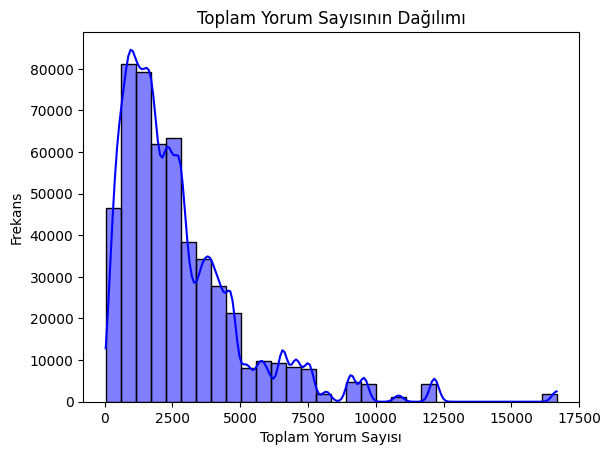

In [73]:
sns.histplot(df['Total_Number_of_Reviews'], bins=30, kde=True, color='blue')
plt.title('Toplam Yorum Sayısının Dağılımı')
plt.xlabel('Toplam Yorum Sayısı')
plt.ylabel('Frekans')
plt.show()

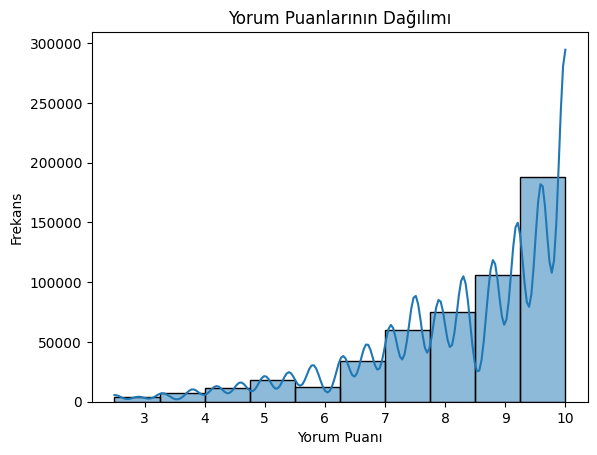

In [74]:
#Yorum Puanlarının Dağılımı:
sns.histplot(df['Reviewer_Score'], bins=10, kde=True)
plt.title('Yorum Puanlarının Dağılımı')
plt.xlabel('Yorum Puanı')
plt.ylabel('Frekans')
plt.show()


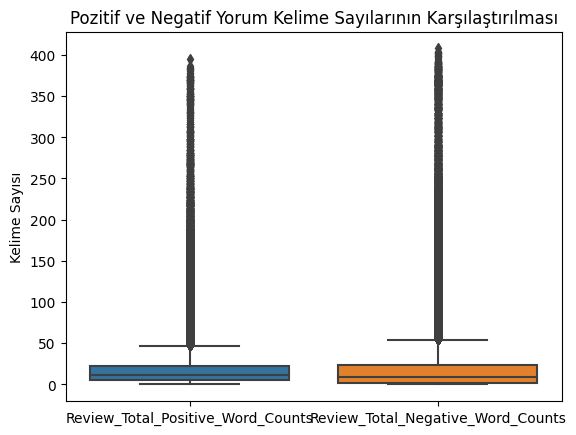

In [75]:
#Olumlu ve Olumsuz Yorumların Karşılaştırılması:
sns.boxplot(data=df[['Review_Total_Positive_Word_Counts', 'Review_Total_Negative_Word_Counts']])
plt.title('Pozitif ve Negatif Yorum Kelime Sayılarının Karşılaştırılması')
plt.ylabel('Kelime Sayısı')
plt.show()

<Axes: xlabel='Reviewer_Score', ylabel='Average_Score'>

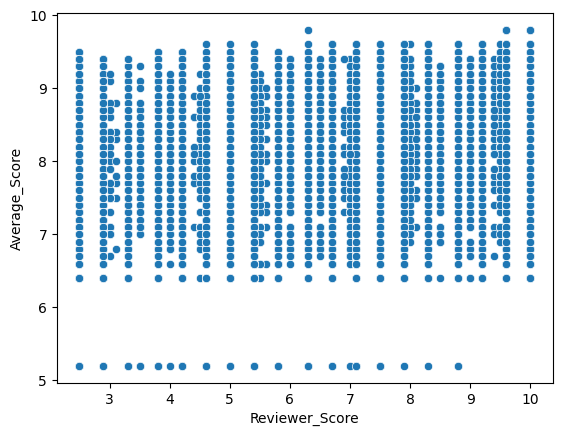

In [76]:
sns.scatterplot(x='Reviewer_Score', y='Average_Score', data=df)

* Verimiz çok olduğundan Top 20 otelin puanları

<Axes: xlabel='Hotel_Name', ylabel='Average_Score'>

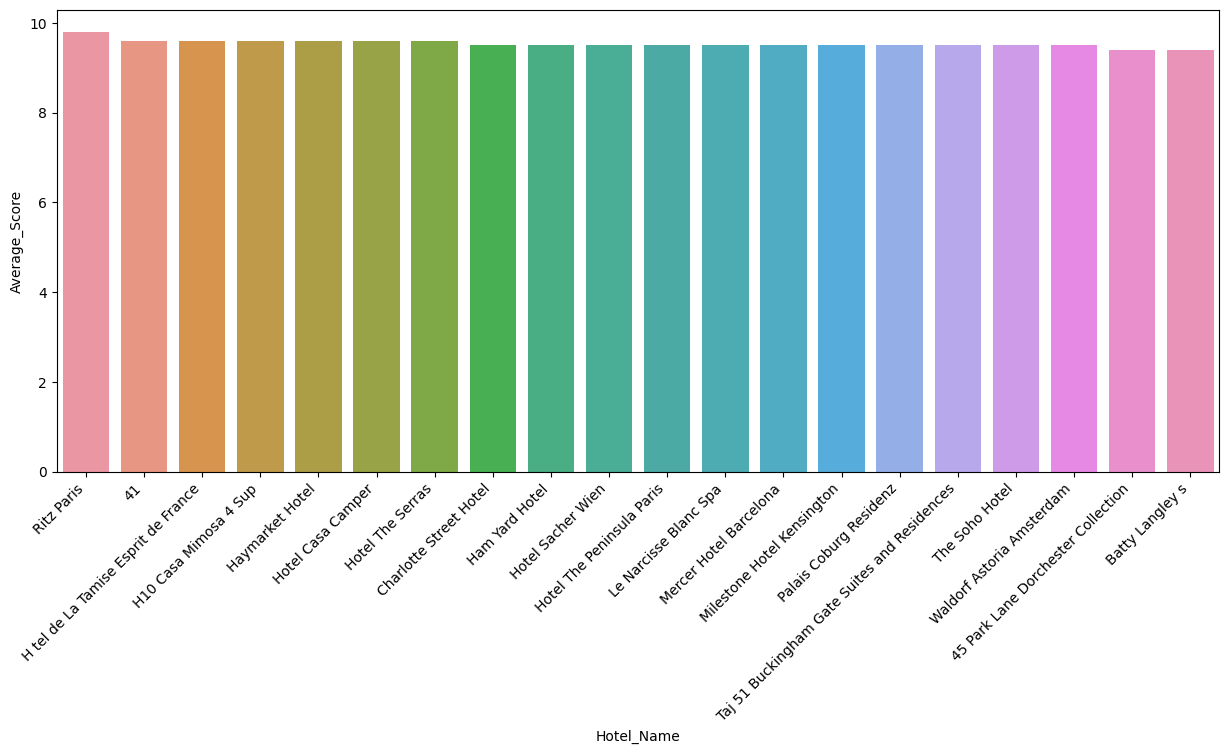

In [77]:
#burada veri çok olduğundan sıkışıklık oluyor bu yüzden ilk önce top hotelleri filtreliyoruz sonra onların grafiğini çıkarıyoruz en başta ise grafiği büyütme işlemi yaptık
plt.figure(figsize=(15, 6))
top_hotels = df.groupby('Hotel_Name').agg({'Average_Score': 'mean'}).nlargest(20, 'Average_Score').reset_index()
plt.xticks(rotation=45, ha='right') #yazıyı eğimli yazdık
sns.barplot(x='Hotel_Name', y='Average_Score', data=top_hotels)


*  Verimiz çok olduğundan en kötü 20 otelin puanlarını listeliyoruz

<Axes: xlabel='Hotel_Name', ylabel='Average_Score'>

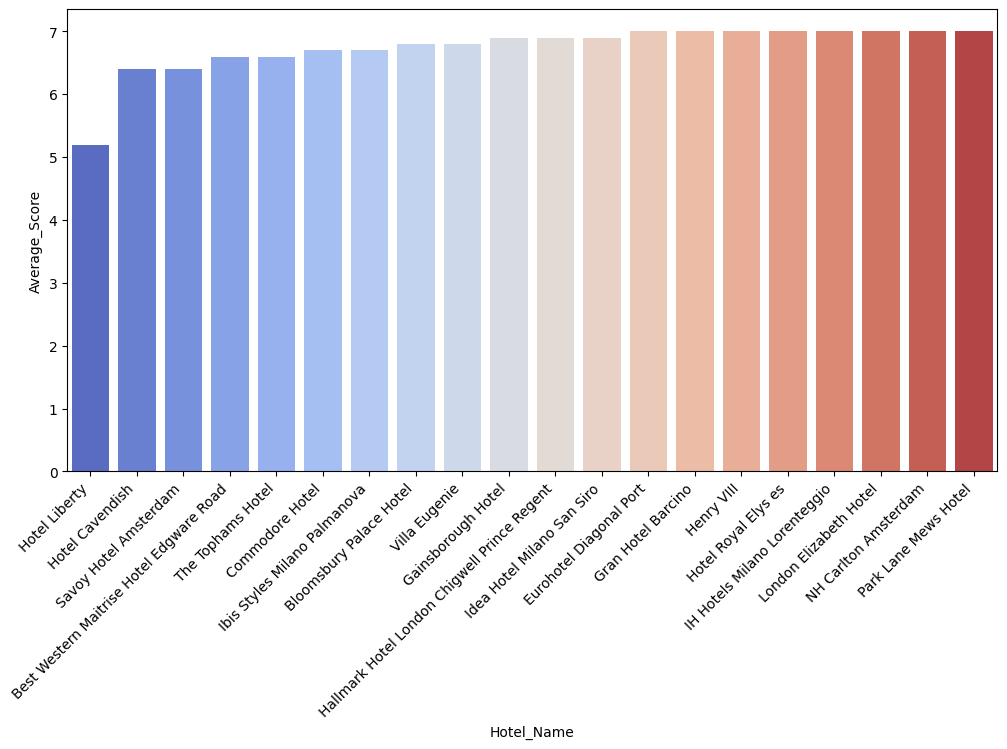

In [78]:
plt.figure(figsize=(12, 6))
bottom_hotels = df.groupby('Hotel_Name').agg({'Average_Score': 'mean'}).nsmallest(20, 'Average_Score').reset_index()
plt.xticks(rotation=45, ha='right') #yazıyı eğimli yazdık
sns.barplot(x='Hotel_Name', y='Average_Score', data=bottom_hotels, palette='coolwarm')

* En Yaygın Milliyetleri Gösterme

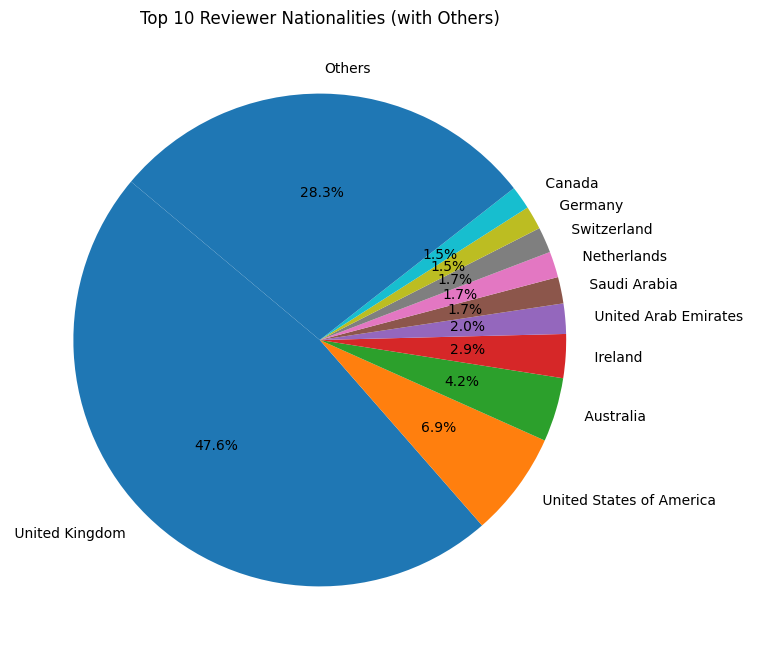

In [79]:
# En yaygın 10 milliyeti seçme
top_nationalities = df['Reviewer_Nationality'].value_counts().nlargest(10)

# 'Diğer' kategorisini eklemek için
others = df['Reviewer_Nationality'].value_counts().sum() - top_nationalities.sum()
top_nationalities['Others'] = others

# Pie chart oluşturma
plt.figure(figsize=(8, 8))
plt.pie(top_nationalities, labels=top_nationalities.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Reviewer Nationalities (with Others)')
plt.show()

In [80]:
#kütüphaneleri import edelim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [82]:
# Label encoding (kategorik verileri sayısala dönüştürme)
le = LabelEncoder()
df['Reviewer_Nationality'] = le.fit_transform(df['Reviewer_Nationality'])
df['Hotel_Name'] = le.fit_transform(df['Hotel_Name'])


In [83]:
from sklearn.model_selection import train_test_split

# Hedef değişken (Reviewer_Score > 7 olarak belirleyelim, 7'den yüksek olanları olumlu olarak işaretleyelim)
X = df[['Total_Number_of_Reviews', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Nationality']]
y = df['Reviewer_Score'] > 7  # Yüksek puanları olumlu olarak etiketleyelim

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
# Standart ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:

# Lojistik Regresyon Modeli
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test_scaled)

In [86]:
 from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 3517 14079]
 [ 1767 83785]]
Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.20      0.31     17596
        True       0.86      0.98      0.91     85552

    accuracy                           0.85    103148
   macro avg       0.76      0.59      0.61    103148
weighted avg       0.82      0.85      0.81    103148



# Gözetimsiz öğrenme. K-Means

In [87]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy as sp 
from sklearn.cluster import KMeans

In [88]:
df = pd.read_csv("/kaggle/input/515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv")
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [89]:
df.index = df.iloc[:,0]

In [90]:
df.index

Index([' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       ' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       ' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       ' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       ' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       ' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       ' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       ' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       ' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       ' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       ...
       'Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria',
       'Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria',
       'Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria',
       'Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria',
       'Wurzbachgasse 21 

In [91]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
Hotel_Address,,,,,,,,,,,,,,,,,
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [92]:
df = df.iloc[:,1:5]

In [93]:
df.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name
Hotel_Address,,,,
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,8/3/2017,7.7,Hotel Arena
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,8/3/2017,7.7,Hotel Arena
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7/31/2017,7.7,Hotel Arena
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7/31/2017,7.7,Hotel Arena
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7/24/2017,7.7,Hotel Arena


In [94]:
df.isnull().sum() #boş veri var mı kontrol edelim

Additional_Number_of_Scoring    0
Review_Date                     0
Average_Score                   0
Hotel_Name                      0
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515738 entries,  s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands to Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Additional_Number_of_Scoring  515738 non-null  int64  
 1   Review_Date                   515738 non-null  object 
 2   Average_Score                 515738 non-null  float64
 3   Hotel_Name                    515738 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 19.7+ MB


In [96]:
df.describe().T #transpozesini alalım (sayısal değerlerin ortalamasını,minimumunu,maksimumunu ve.s gösterir)

,count,mean,std,min,25%,50%,75%,max
Additional_Number_of_Scoring,515738.0,498.081836,500.538467,1.0,169.0,341.0,660.0,2682.0
Average_Score,515738.0,8.397487,0.548048,5.2,8.1,8.4,8.8,9.8


array([[<Axes: title={'center': 'Additional_Number_of_Scoring'}>,
        <Axes: title={'center': 'Average_Score'}>]], dtype=object)

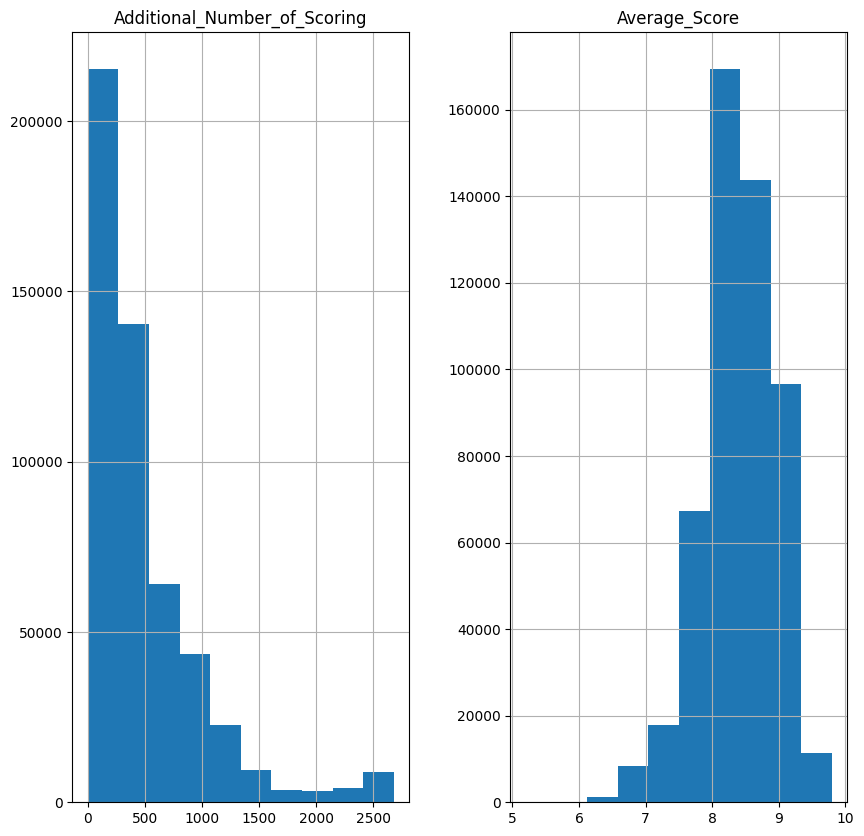

In [97]:
df.hist(figsize=(10,10))

In [98]:
numeric_df = df.select_dtypes(include=[np.number]) #sayısal verileri seçelim


In [99]:
kmeans=KMeans(n_clusters = 2)
kmeans

KMeans(n_clusters=2)

In [100]:
?kmeans #bilgi amaçlı

Object `kmeans #bilgi amaçlı` not found.


In [101]:
k_fit = kmeans.fit(numeric_df) #model verisetimize fit edilmiş oluyor

In [102]:
k_fit.n_clusters

2

In [103]:
k_fit.cluster_centers_ #cluster merkezlerine ulaşıyoruz

array([[1426.73057596,    8.28921785],
       [ 325.06949393,    8.41765802]])

In [104]:
k_fit.labels_ 

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

* Görselleştirme

In [105]:
kmeans=KMeans(n_clusters = 2)
k_fit = kmeans.fit(numeric_df)

In [106]:
kumeler = k_fit.labels_

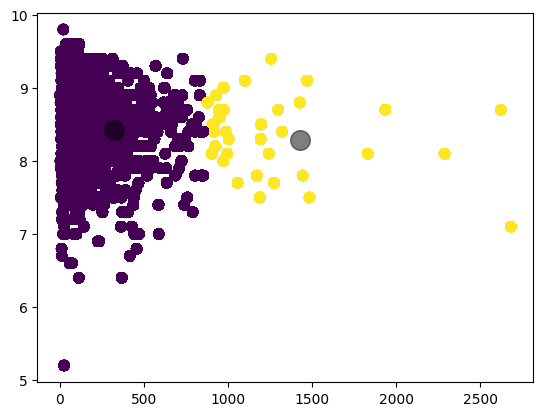

In [107]:
plt.scatter(numeric_df.iloc[:,0], numeric_df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.5) #merkezleri gösteriyoruz
plt.show()


In [108]:
#kumeler ve gözlem birimleri
kmeans = KMeans (n_clusters = 3)
k_fit = kmeans.fit(numeric_df)
kumeler = k_fit. labels_
pd.DataFrame({"Oteller" : numeric_df.index, "Kumeler": kumeler}) [0:10]

,Oteller,Kumeler
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1


In [109]:
numeric_df["kume_no"]=kumeler
numeric_df.head()

,Additional_Number_of_Scoring,Average_Score,kume_no
Hotel_Address,,,
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7.7,1
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7.7,1
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7.7,1
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7.7,1
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7.7,1


In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sayısal hale getirme
numeric_df = pd.get_dummies(numeric_df)  # df, orijinal veri çerçeveniz olmalı

# Hedef değişkeni (Average_Score) kaldırın
numeric_df_dropped = numeric_df.drop('Average_Score', axis=1)

# Veriyi numpy dizisine çevirin ve gereksiz sütunları çıkartın
X = numeric_df_dropped.values[:, 1:]

# Veriyi ölçeklendirme
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

# Veriyi kontrol edin
print(numeric_df.head())

                                                    Additional_Number_of_Scoring  \
Hotel_Address                                                                      
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...                           194   
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...                           194   
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...                           194   
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...                           194   
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...                           194   

                                                    Average_Score  kume_no  
Hotel_Address                                                               
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...            7.7        1  
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...            7.7        1  
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...            7.7        1  
s Gravesandestraat 55 Oost

In [111]:
#hedef değişkeni drop etme 
scaler = StandardScaler()
numeric_df_dropped = numeric_df.drop('Average_Score', axis=1)
X = numeric_df_dropped.values[:, 1:]
scaled_x = scaler.fit_transform(X)

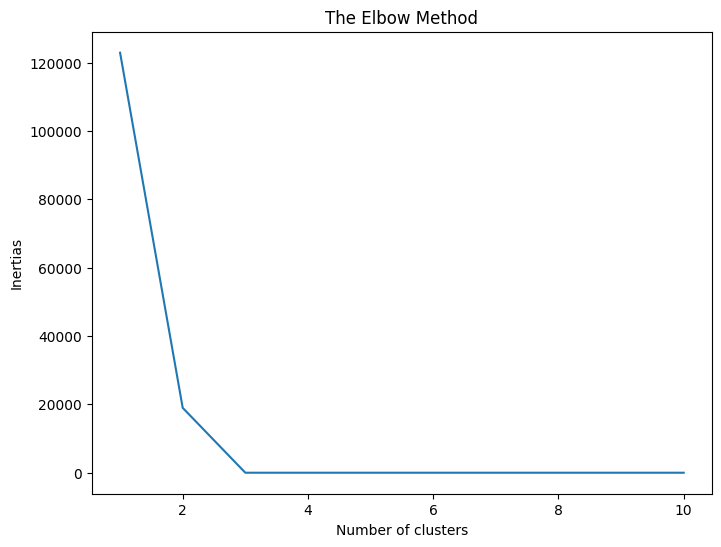

In [112]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

In [113]:
#dirseğin 3 olduğunu anlamış oluyoruz yukarıdaki grafikten
model = KMeans(n_clusters=3)
training_points = scaled_x[:1000]
test_points = scaled_x[1000:]
model.fit(training_points)
labels = model.predict(test_points)

In [115]:
# Puanları olumlu (1) ve olumsuz (0) olarak işaretleme
df['Sentiment'] = df['Average_Score'].apply(lambda x: 1 if x > 7 else 0)

# Sonuçları kontrol edin
print(df[['Average_Score', 'Sentiment']].head())

                                                    Average_Score  Sentiment
Hotel_Address                                                               
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...            7.7          1
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...            7.7          1
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...            7.7          1
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...            7.7          1
s Gravesandestraat 55 Oost 1092 AA Amsterdam Ne...            7.7          1


In [116]:
# Kategorilere göre veri setinin özetini çıkarma
print(df['Sentiment'].value_counts())

Sentiment
1    506174
0      9564
Name: count, dtype: int64


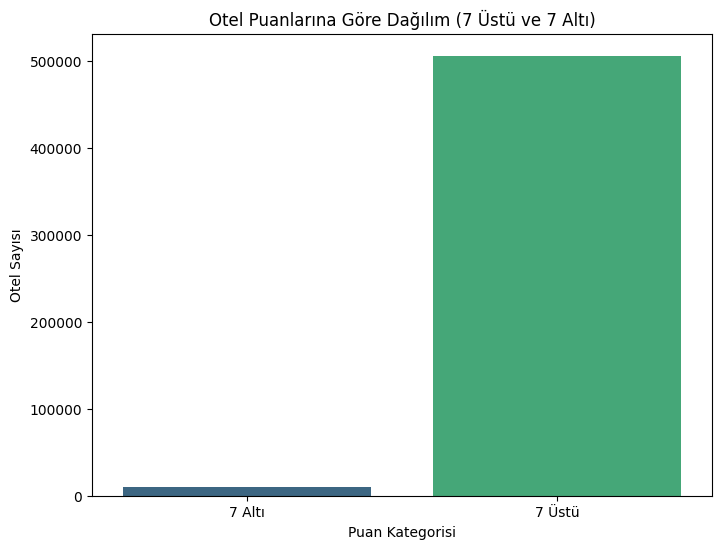

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating_Category sütunundaki her bir kategorinin sayısını hesaplayın
rating_category_counts = df['Sentiment'].value_counts()

# Bar grafiği oluşturun
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_category_counts.index, y=rating_category_counts.values, palette='viridis')
plt.title('Otel Puanlarına Göre Dağılım (7 Üstü ve 7 Altı)')
plt.xlabel('Puan Kategorisi')
plt.ylabel('Otel Sayısı')
plt.xticks(ticks=[0, 1], labels=['7 Altı', '7 Üstü'])
plt.show()

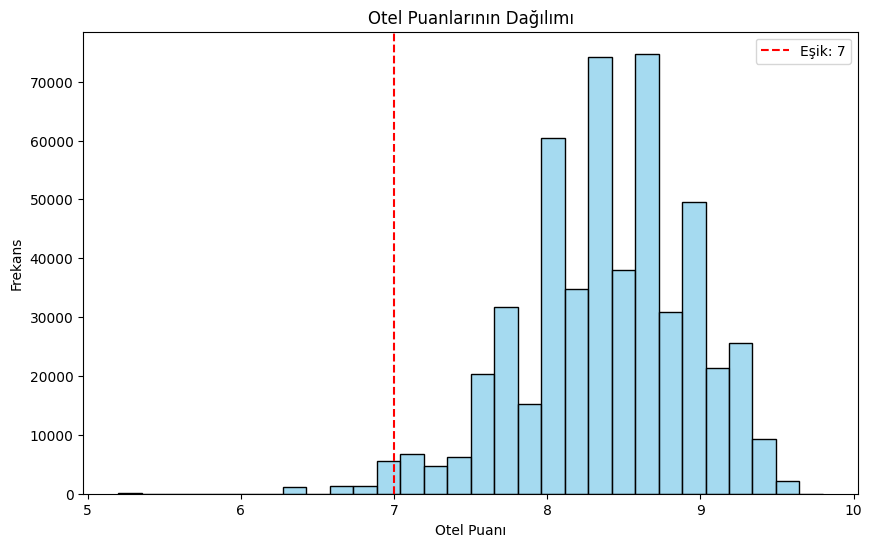

In [122]:
#2. Bar Grafik ile Kategorilere Göre Dağılımı Görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(df['Average_Score'], bins=30, kde=False, color='skyblue')
plt.axvline(x=7, color='red', linestyle='--', label='Eşik: 7')
plt.title('Otel Puanlarının Dağılımı')
plt.xlabel('Otel Puanı')
plt.ylabel('Frekans')
plt.legend()
plt.show()